## The Data

### Predicting Global Life Expectancy Using Health and Disease Factors

Data Source: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated


Attribute Information:

1. Country: 179 unique countries in the dataset
2. Region: 179 countries distributed between 9 regions
3. Year: years observed from 2000-2015
4. Infant_deaths: Represents infant deaths per 1000 population
5. Under_five_deaths: Represents deaths of children under five years old per 1000 population
6. Adult_mortality: Represents deaths of adults per 1000 population
7. Alcohol_consumption: Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
8. Hepatitis_B: Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
9. Measles: Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
10. BMI: measures the BMI of the individual for nutritional status
11. Polio: Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
12. Diptheria: Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
13. Incidents_HIV: Incidents of HIV per 1000 population aged 15-49
14. GDP_per_capita: GDP per capita in current USD
15. Population_mln: total population in millions
16. Thinness_ten_nineteen_years: Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
17. Thinness_five_nine_years: Prevalence of thinness 18. among children aged 5-9 years. BMI < -2 standard deviations below the median.
19. Schooling: Average years that people aged 25+ spent in formal education
20. Economy_status_developed: developed country
21. Economy_status_developing: developing country
22. Life_expectancy (TARGET VARIABLE): The life expectancy of the country

### Initial Statistics and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
life = pd.read_csv('WHO_Life_Expectancy_Data.csv')
life.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
#Size of data dimensions
life.shape

(2864, 21)

In [4]:
#Renaming variable for ease of use
life = life.rename(columns={'Infant_deaths': 'InfantDeaths',
                                       'Under_five_deaths': 'UnderFiveDeaths', 
                                       'Adult_mortality': 'AdultMortality', 
                                       'Alcohol_consumption': 'AlcoholConsumption', 
                                       'GDP_per_capita': 'GDP_Per_Capita',
                                       'Population_mln': 'Population',
                                       'Schooling': 'Education',
                                       'Thinness_ten_nineteen_years': 'Thinness_10-19',
                                       'Thinness_five_nine_years': 'Thinness_5-9', 
                                       'Economy_status_Developed': 'Developed', 
                                       'Economy_status_Developing': 'Developing', 
                                       'Life_expectancy': 'LifeExpectancy',})

In [5]:
#Quick info about the dataset
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2864 non-null   object 
 1   Region              2864 non-null   object 
 2   Year                2864 non-null   int64  
 3   InfantDeaths        2864 non-null   float64
 4   UnderFiveDeaths     2864 non-null   float64
 5   AdultMortality      2864 non-null   float64
 6   AlcoholConsumption  2864 non-null   float64
 7   Hepatitis_B         2864 non-null   int64  
 8   Measles             2864 non-null   int64  
 9   BMI                 2864 non-null   float64
 10  Polio               2864 non-null   int64  
 11  Diphtheria          2864 non-null   int64  
 12  Incidents_HIV       2864 non-null   float64
 13  GDP_Per_Capita      2864 non-null   int64  
 14  Population          2864 non-null   float64
 15  Thinness_10-19      2864 non-null   float64
 16  Thinne

In [6]:
#Missing values
life.isnull().sum()

Country               0
Region                0
Year                  0
InfantDeaths          0
UnderFiveDeaths       0
AdultMortality        0
AlcoholConsumption    0
Hepatitis_B           0
Measles               0
BMI                   0
Polio                 0
Diphtheria            0
Incidents_HIV         0
GDP_Per_Capita        0
Population            0
Thinness_10-19        0
Thinness_5-9          0
Education             0
Developed             0
Developing            0
LifeExpectancy        0
dtype: int64

In [7]:
#Duplicate values
life.duplicated().sum()

0

In [8]:
#Statistics about the data
life.describe()

,Year,InfantDeaths,UnderFiveDeaths,AdultMortality,AlcoholConsumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_Per_Capita,Population,Thinness_10-19,Thinness_5-9,Education,Developed,Developing,LifeExpectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


### Correlation Matrix

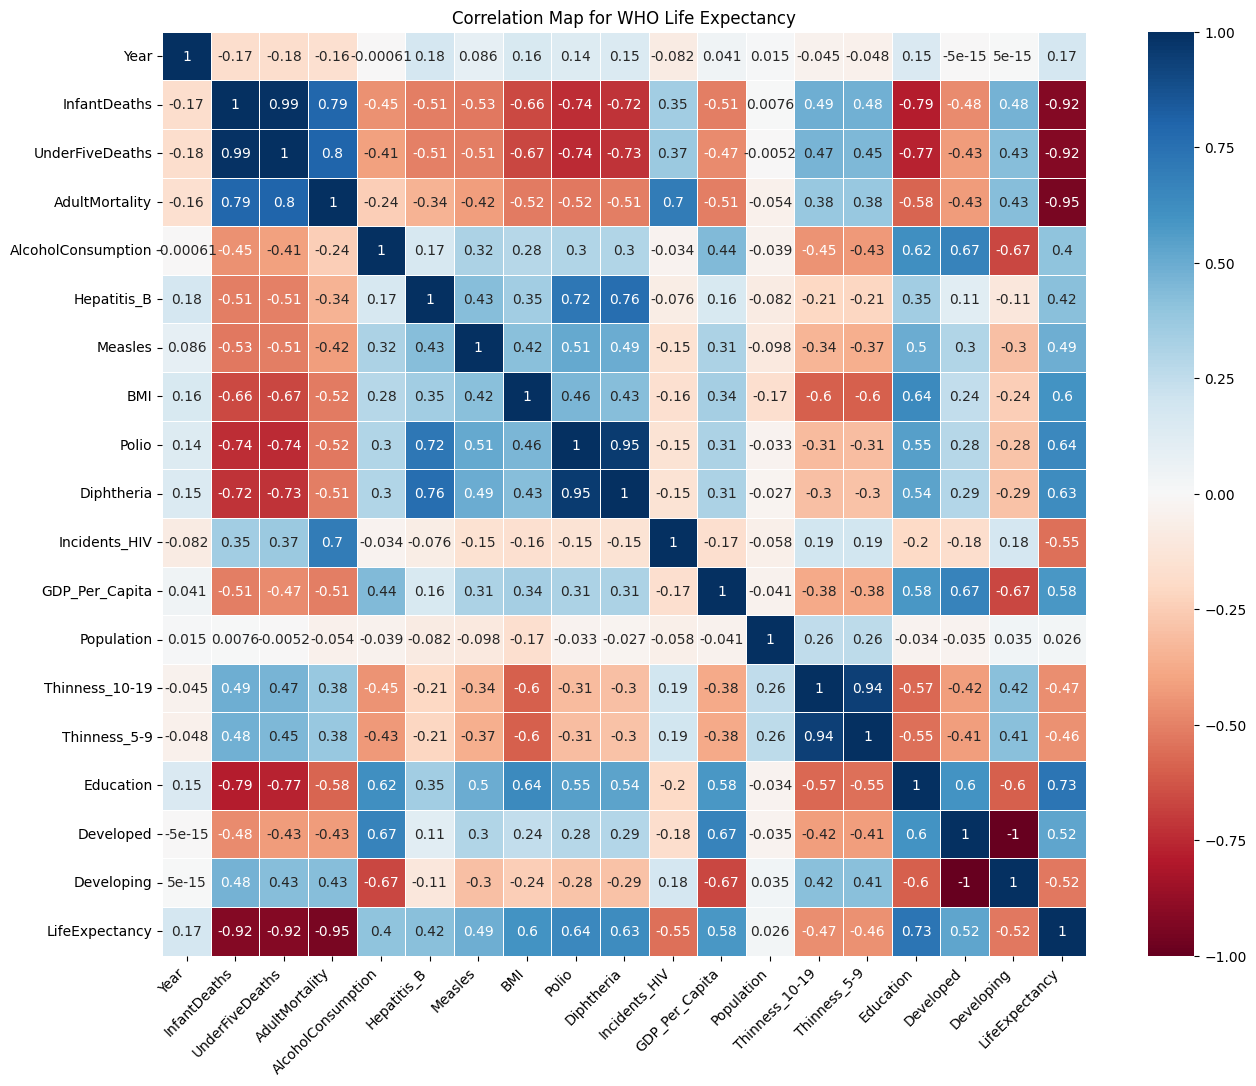

,Year,InfantDeaths,UnderFiveDeaths,AdultMortality,AlcoholConsumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_Per_Capita,Population,Thinness_10-19,Thinness_5-9,Education,Developed,Developing,LifeExpectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
InfantDeaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
UnderFiveDeaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
AdultMortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
AlcoholConsumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


In [12]:
#seperating country and region from the matrix as they are string variables, pearson correlation
corr = life.loc[:, ~life.columns.isin(['Country', 'Region'])].corr(method='pearson')

#correlation matrix
plt.figure(figsize=(16,12))
plt.title('Correlation Map for WHO Life Expectancy')
ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap='RdBu',
                 square=True,
                 linewidths=.5,
                 linecolor='white',
                 annot=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45,
                   horizontalalignment='right')
plt.show()

#correlation values
corr

### Exploratory Data Analysis and Visualizations 

#### Target Variable: Life Expectancy

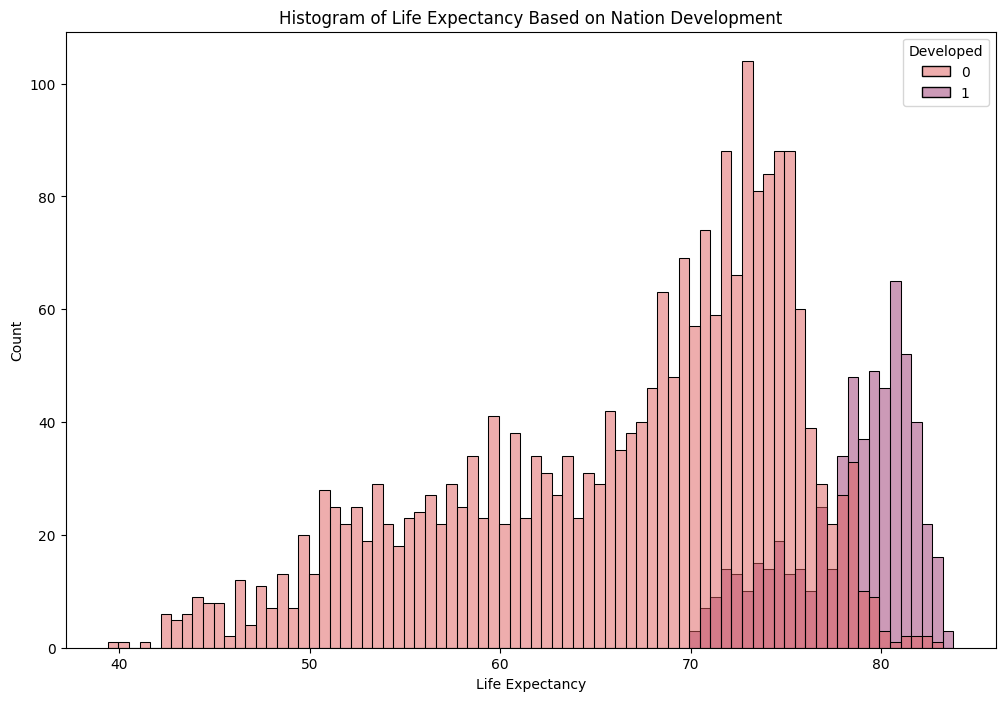

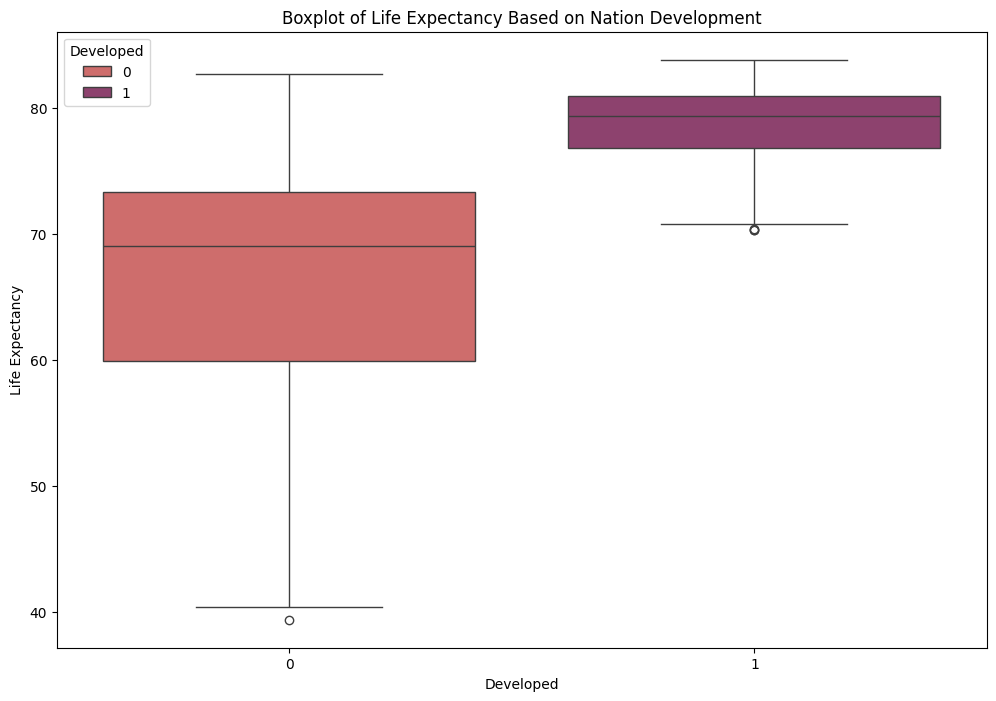

In [13]:
#Histogram of life expectancy when comparing developed and developing nations
plt.figure(figsize=(12,8))
plt.title('Histogram of Life Expectancy Based on Nation Development')
plt.xlabel('Life Expectancy')
sns.histplot(data=life, 
             x='LifeExpectancy', 
             hue='Developed', 
             bins=80, 
             palette='flare');

#Box plot of life expectancy by development
plt.figure(figsize=(12,8))
plt.title('Boxplot of Life Expectancy Based on Nation Development')
plt.ylabel('Life Expectancy')
sns.boxplot(data=life, 
            y='LifeExpectancy', 
            x='Developed', 
            hue='Developed', 
            palette='flare');

#### Regional Data 

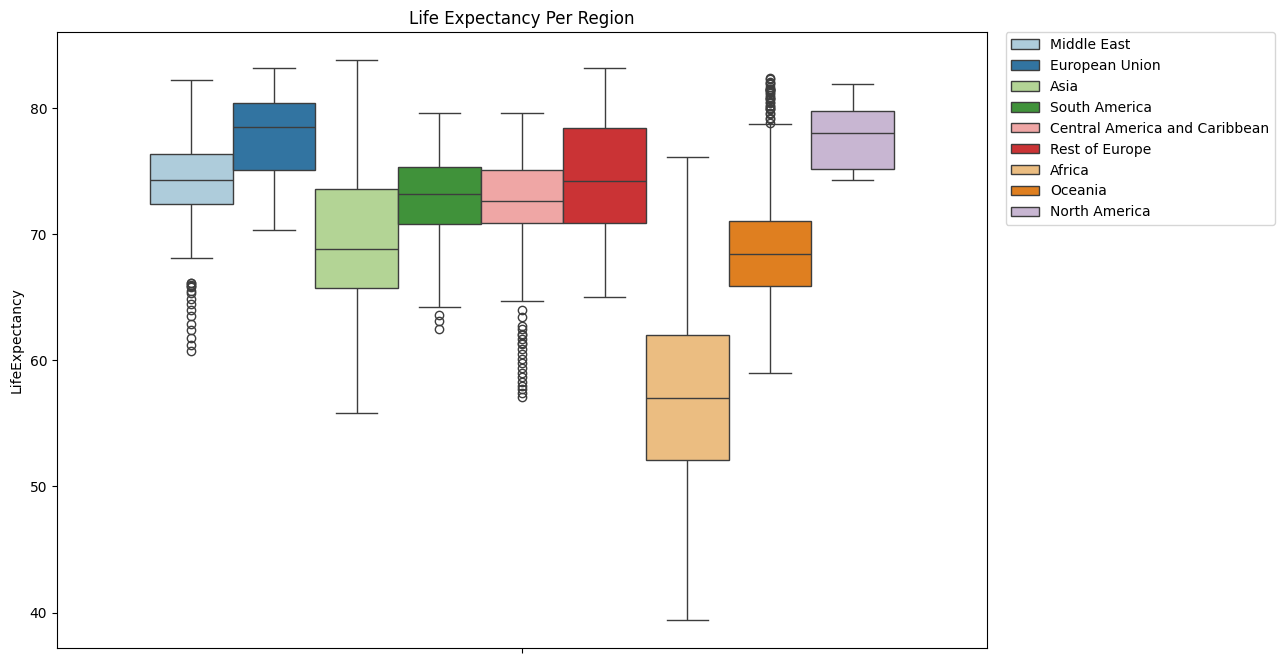

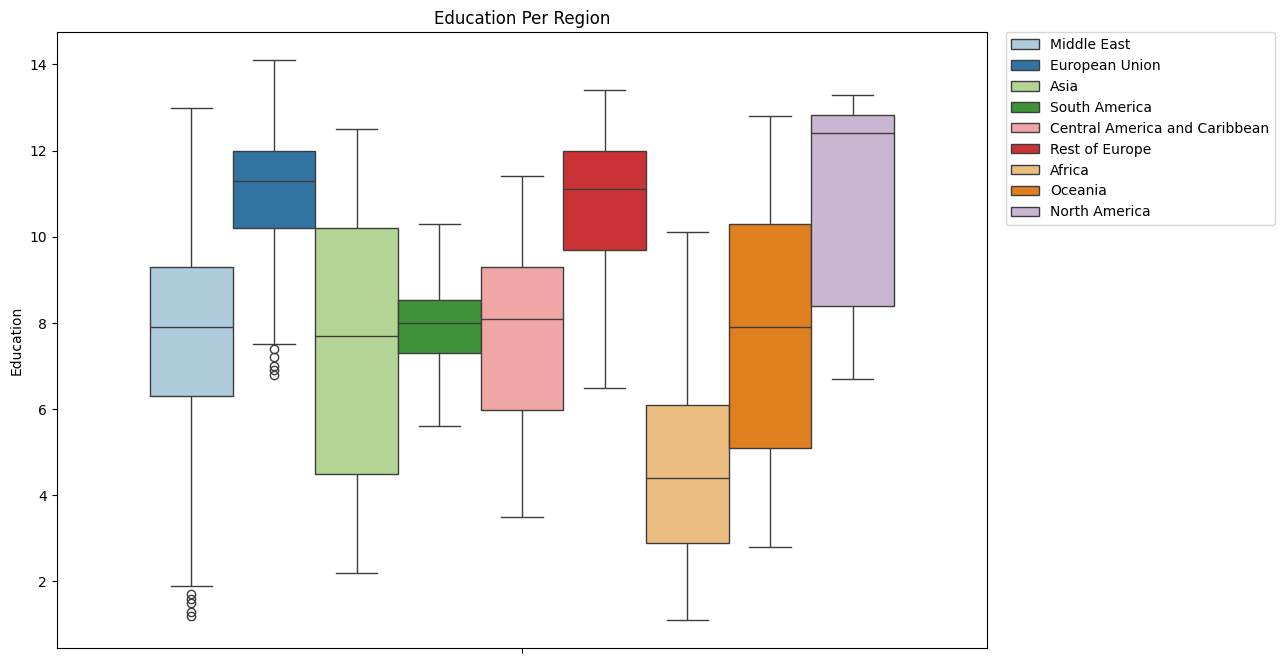

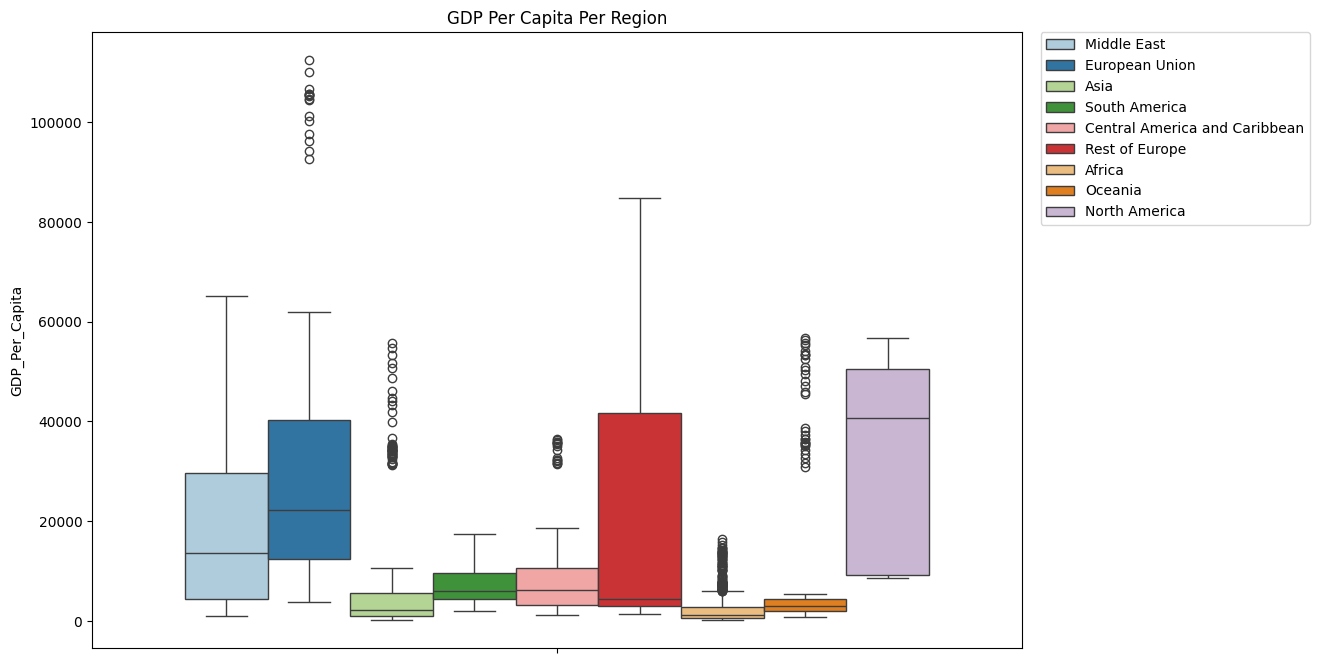

In [14]:
#Life Expectancy Per Region
plt.figure(figsize=(12, 8))
plt.title('Life Expectancy Per Region')
sns.boxplot(data=life, 
            hue='Region', 
            y='LifeExpectancy', 
            palette='Paired')
plt.legend(bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0);

#Education Per Region 
plt.figure(figsize=(12, 8))
plt.title('Education Per Region')
sns.boxplot(data=life, 
            hue='Region', 
            y='Education', 
            palette='Paired')
plt.legend(bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0);

#GDP Per Capita Per Region
plt.figure(figsize=(12, 8))
plt.title('GDP Per Capita Per Region')
sns.boxplot(data=life, 
            hue='Region', 
            y='GDP_Per_Capita', 
            palette='Paired')
plt.legend(bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0);

#### Life Expectancy By Country

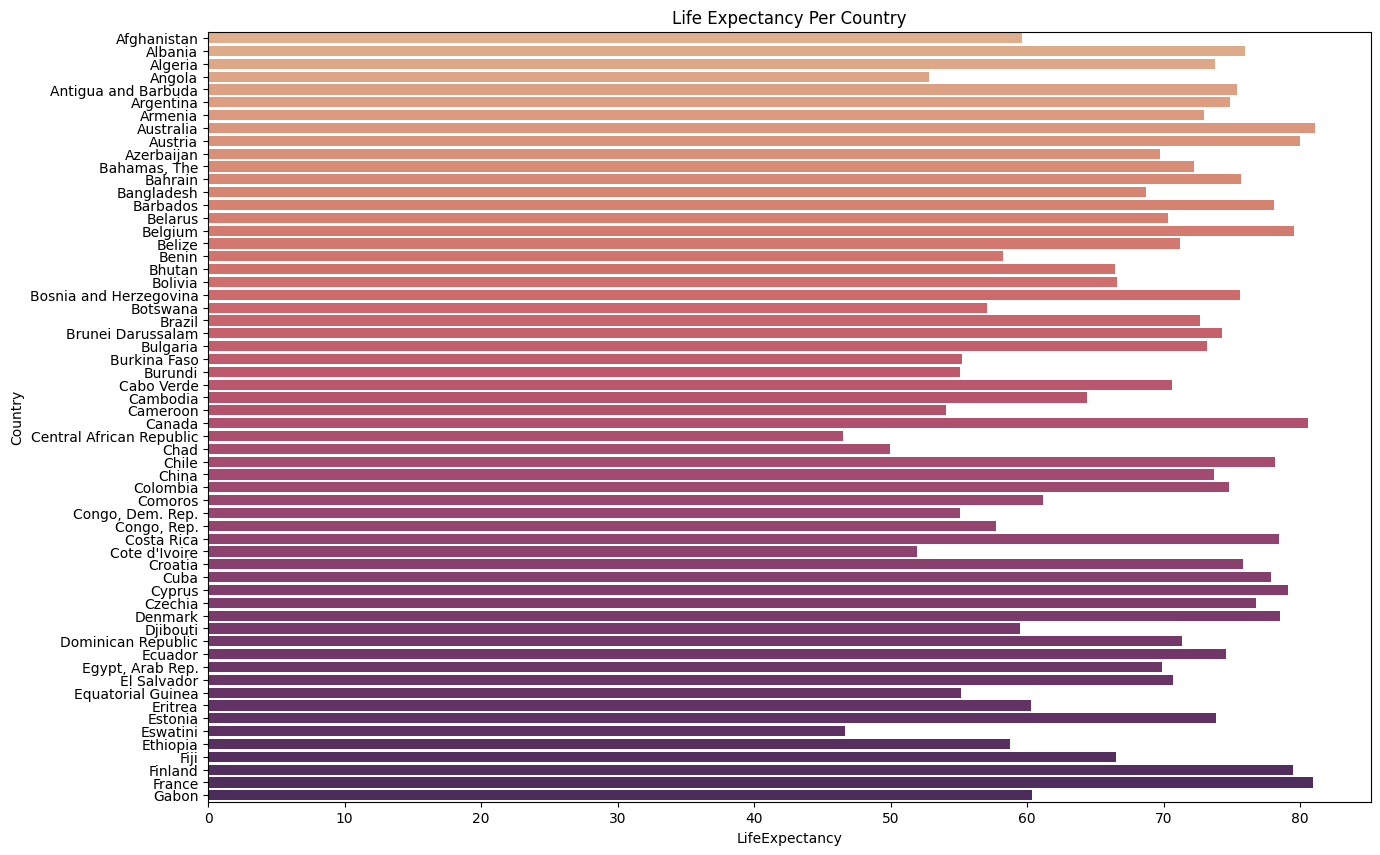

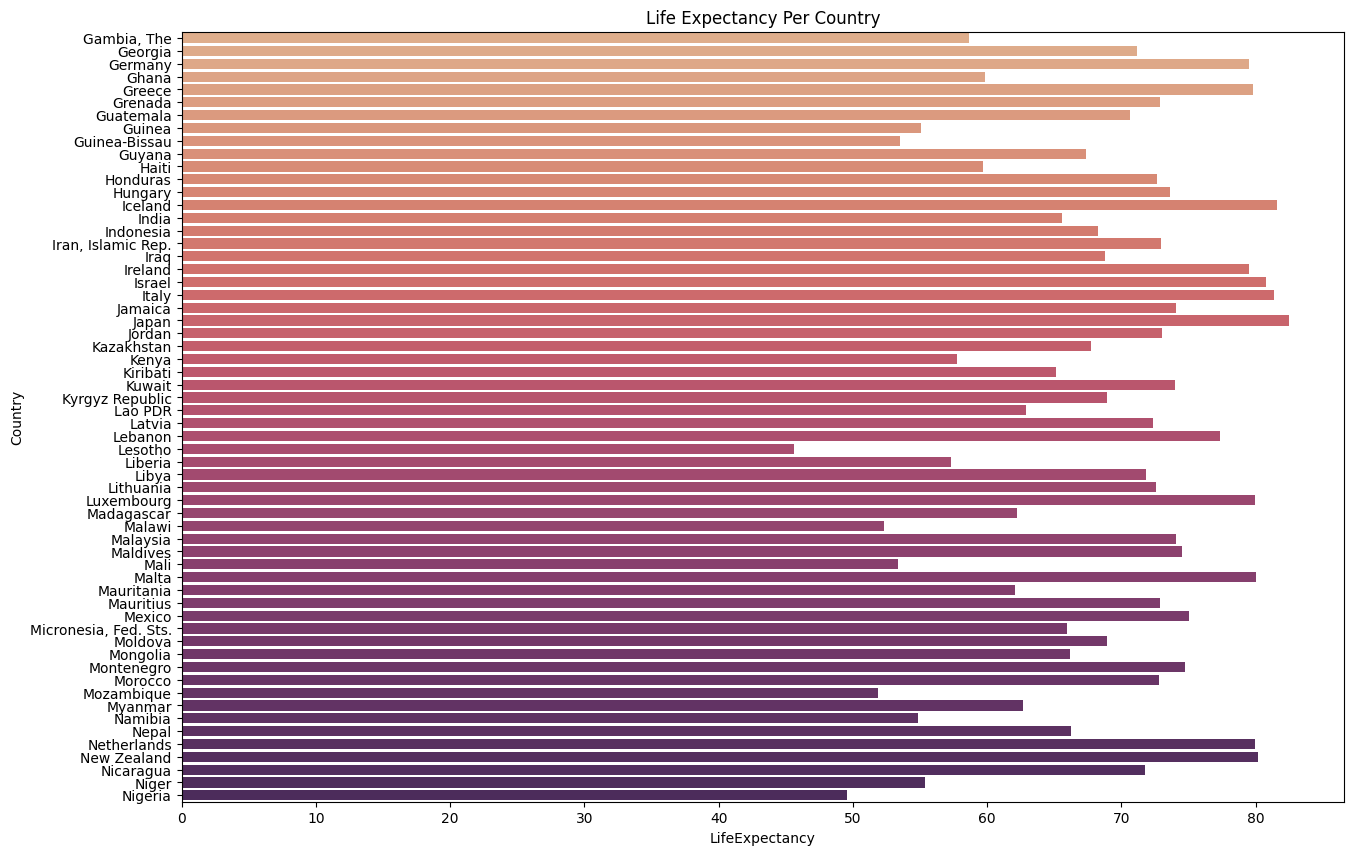

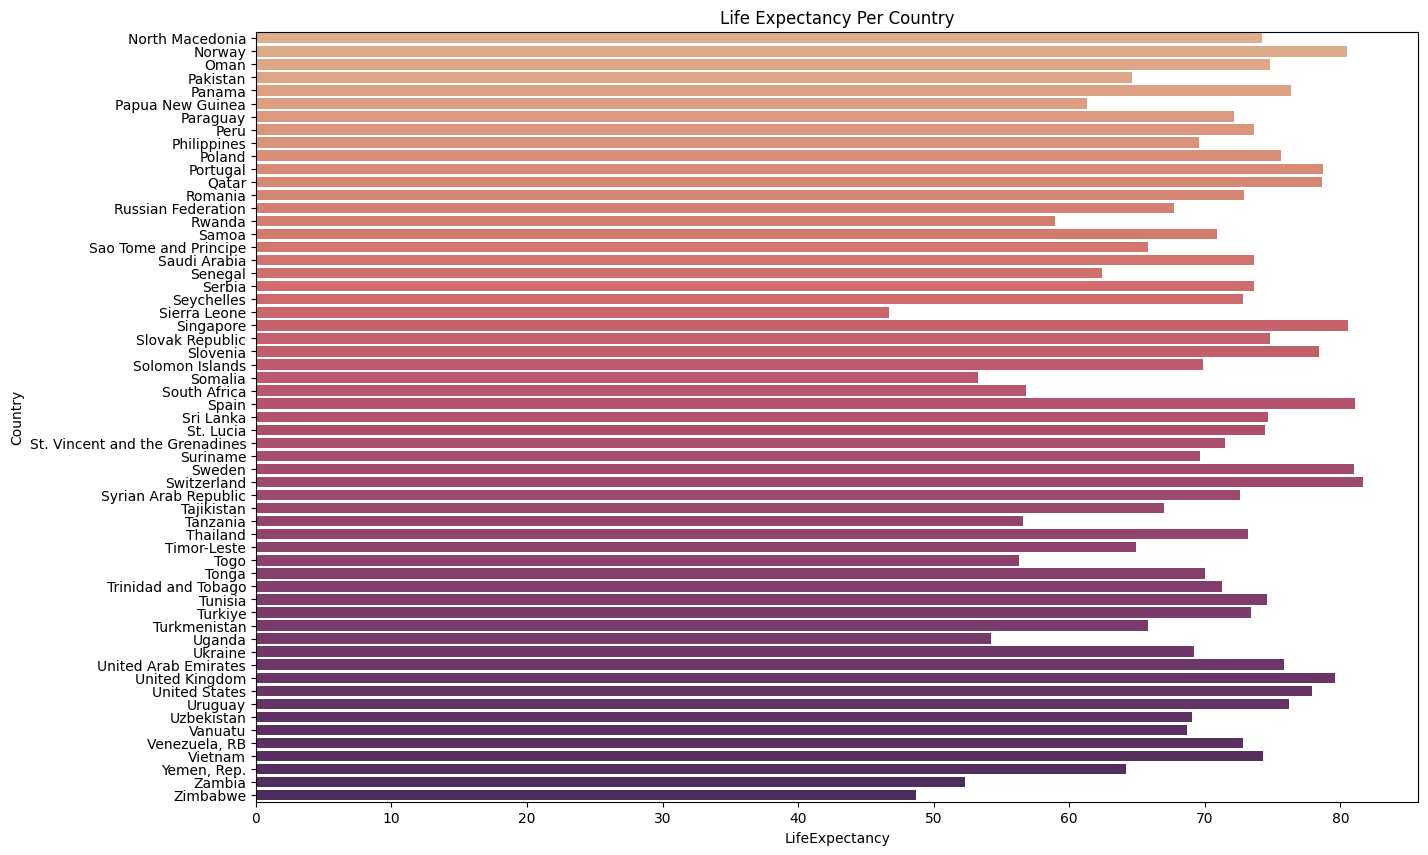

In [15]:
#These graphs sort the life expectancy by country (alphabetical)
#the unique country name is retrieved to prevent duplicates from occuring (e.g. only 1 norway instead of 15)
#The countries are then grouped and the AVERAGE life expectancy (from 2000-2015) is taken and plotted

#Graph 1: The first 60 countries alphabetically
plt.figure(figsize=(15,10))
plt.title('Life Expectancy Per Country')
plt.ylabel('Country')
sns.barplot(y=life.sort_values(by='Country')['Country'].unique()[0:60], 
            x=life.groupby('Country')['LifeExpectancy'].mean()[0:60],
            palette='flare');

#Graph 2: the middle 60 countries alphabetically
plt.figure(figsize=(15,10))
plt.title('Life Expectancy Per Country')
plt.ylabel('Country')
sns.barplot(y=life.sort_values(by='Country')['Country'].unique()[60:120], 
            x=life.groupby('Country')['LifeExpectancy'].mean()[60:120],
            palette='flare');

#Graph 3: the remaining countries alphabetically
plt.figure(figsize=(15,10))
plt.title('Life Expectancy Per Country')
plt.ylabel('Country')
sns.barplot(y=life.sort_values(by='Country')['Country'].unique()[120:179], 
            x=life.groupby('Country')['LifeExpectancy'].mean()[120:179],
            palette='flare');

#### Infant/Adult Mortality Rates and Life Expectancy

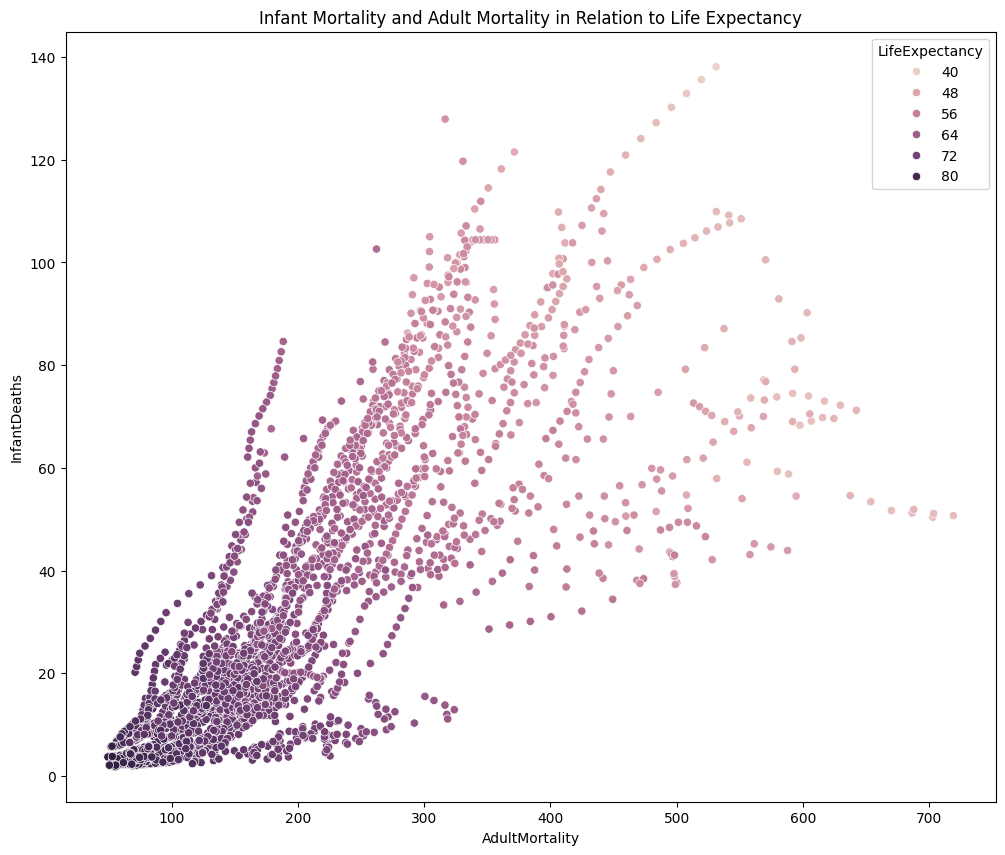

In [31]:
plt.figure(figsize=(12,10))
plt.title('Infant Mortality and Adult Mortality in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='AdultMortality',
                y='InfantDeaths',
                hue='LifeExpectancy');

#### Life Expectancy and Behavioural Factors (diet, alcohol, physical activity, etc.)

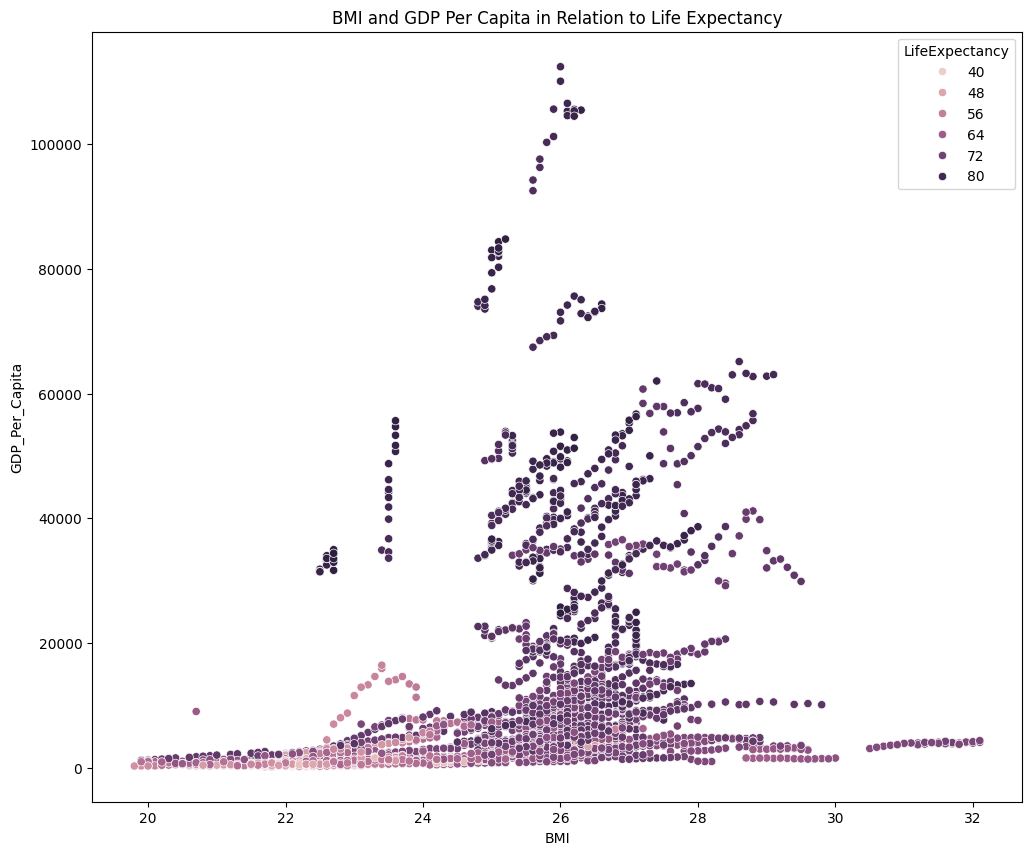

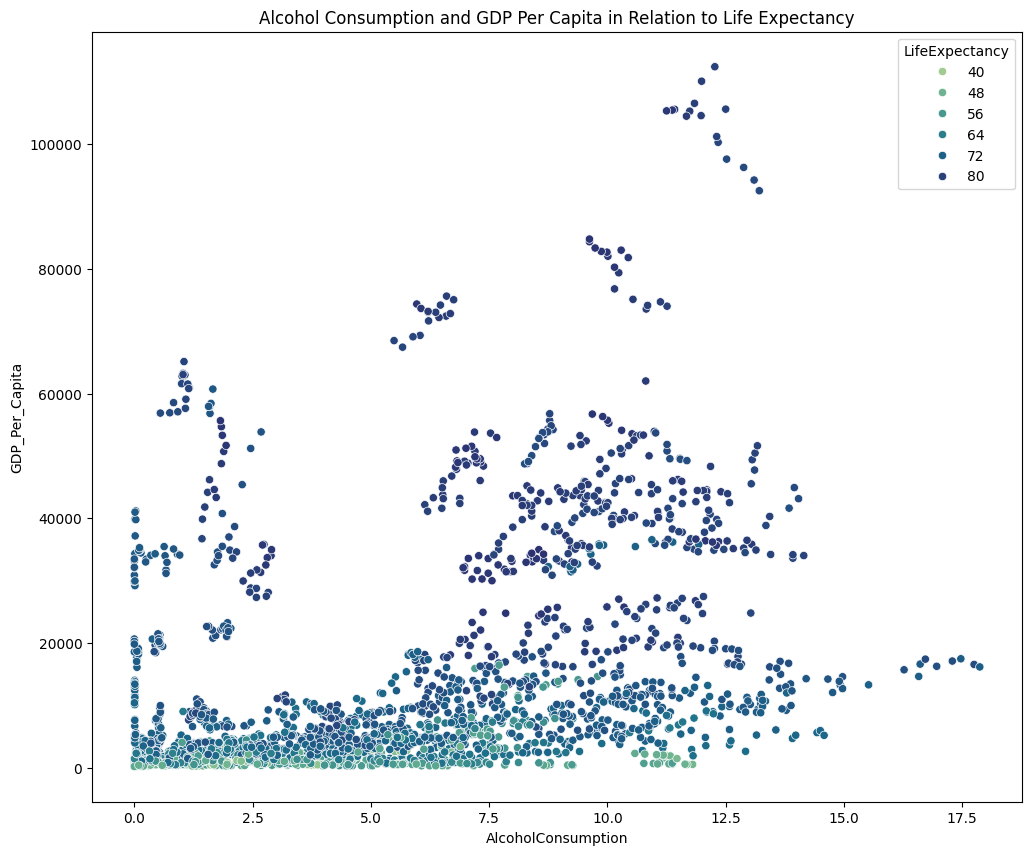

In [35]:
#BMI and GDP_Per_Capita
plt.figure(figsize=(12,10))
plt.title('BMI and GDP Per Capita in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='BMI',
                y='GDP_Per_Capita',
                hue='LifeExpectancy');

#Alcohol Consumption and GDP_Per_Capita
plt.figure(figsize=(12,10))
plt.title('Alcohol Consumption and GDP Per Capita in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='AlcoholConsumption',
                y='GDP_Per_Capita',
                hue='LifeExpectancy',
                palette='crest');

#### Education, Income, Population Density and Life Expectancy

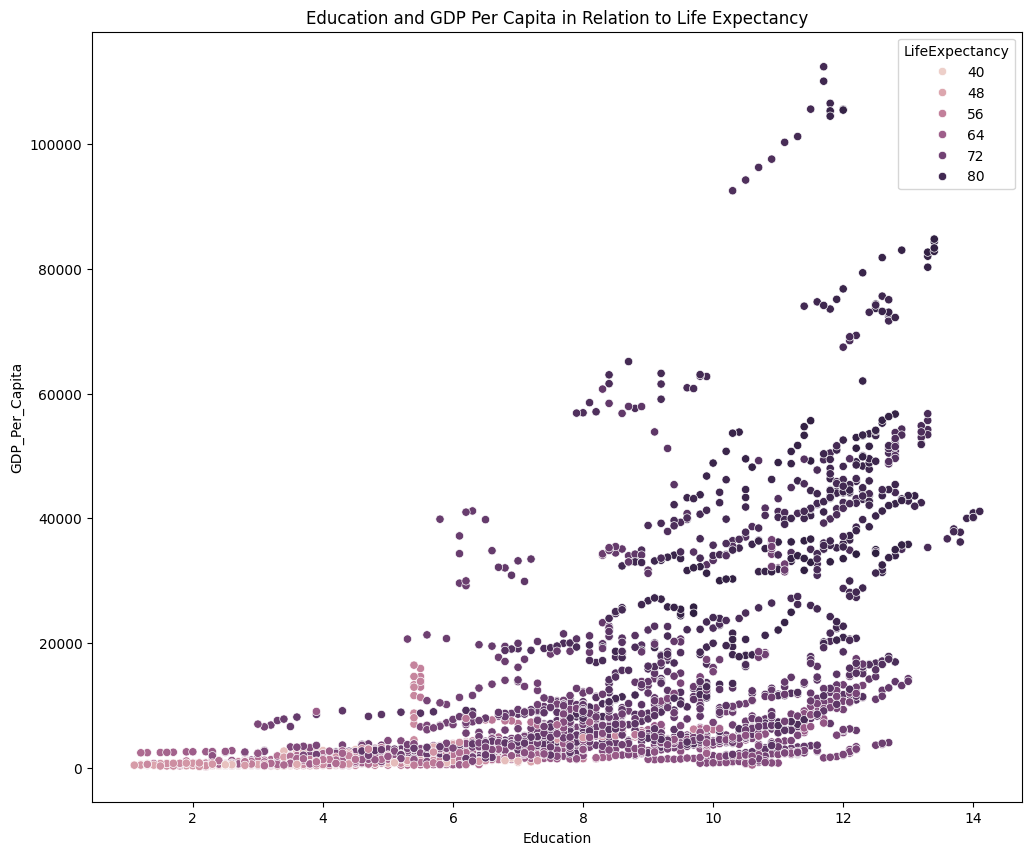

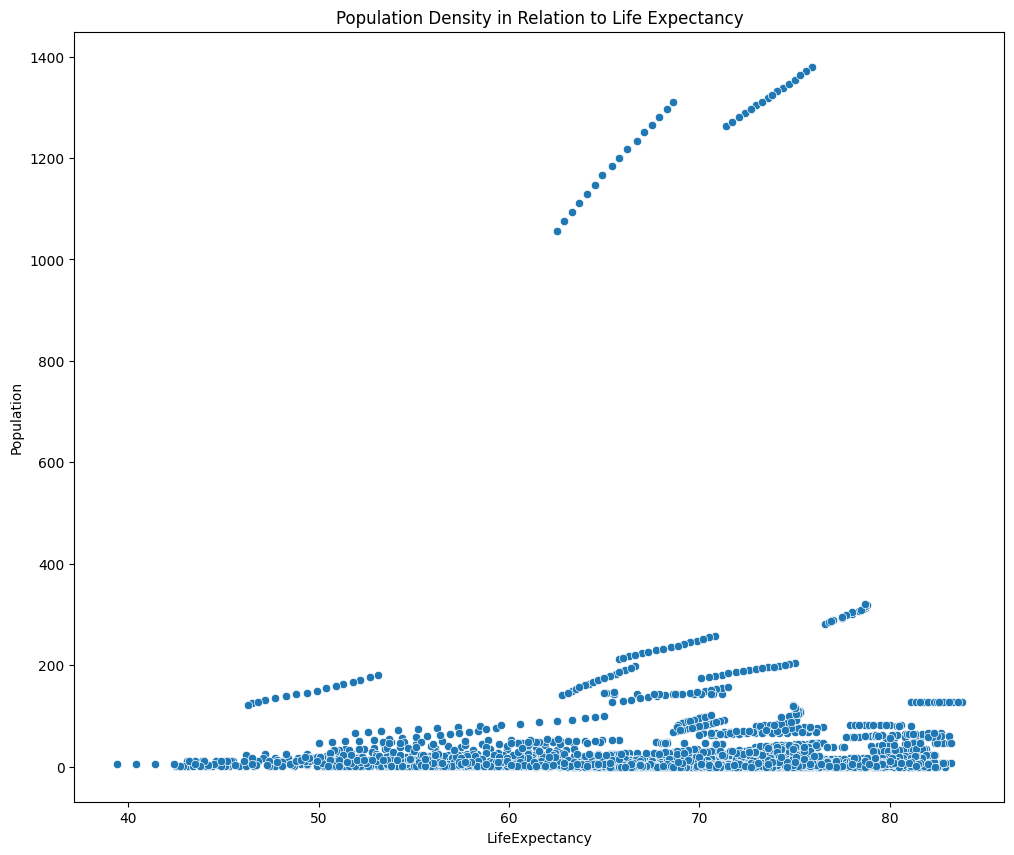

In [38]:
#Education and Income 
plt.figure(figsize=(12,10))
plt.title('Education and GDP Per Capita in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Education',
                y='GDP_Per_Capita',
                hue='LifeExpectancy');

#Population Density and Life Expectancy
plt.figure(figsize=(12,10))
plt.title('Population Density in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                y='Population',
                x='LifeExpectancy');

#### Immunization, Disease and Life Expectancy

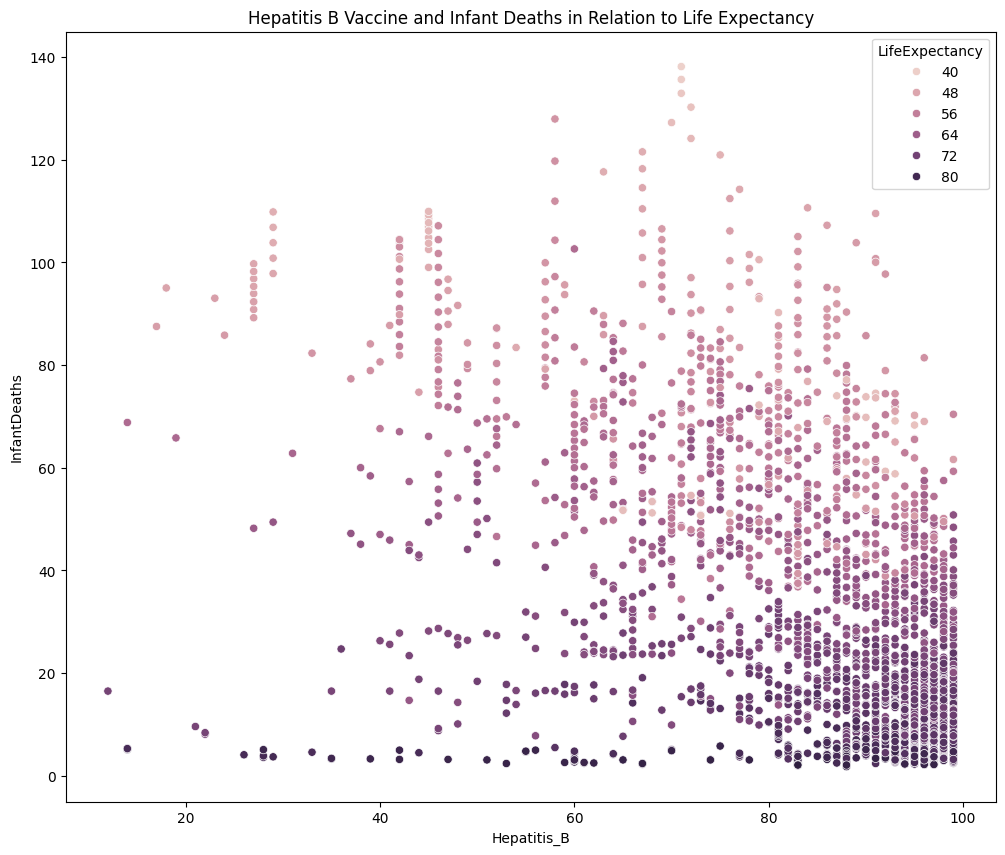

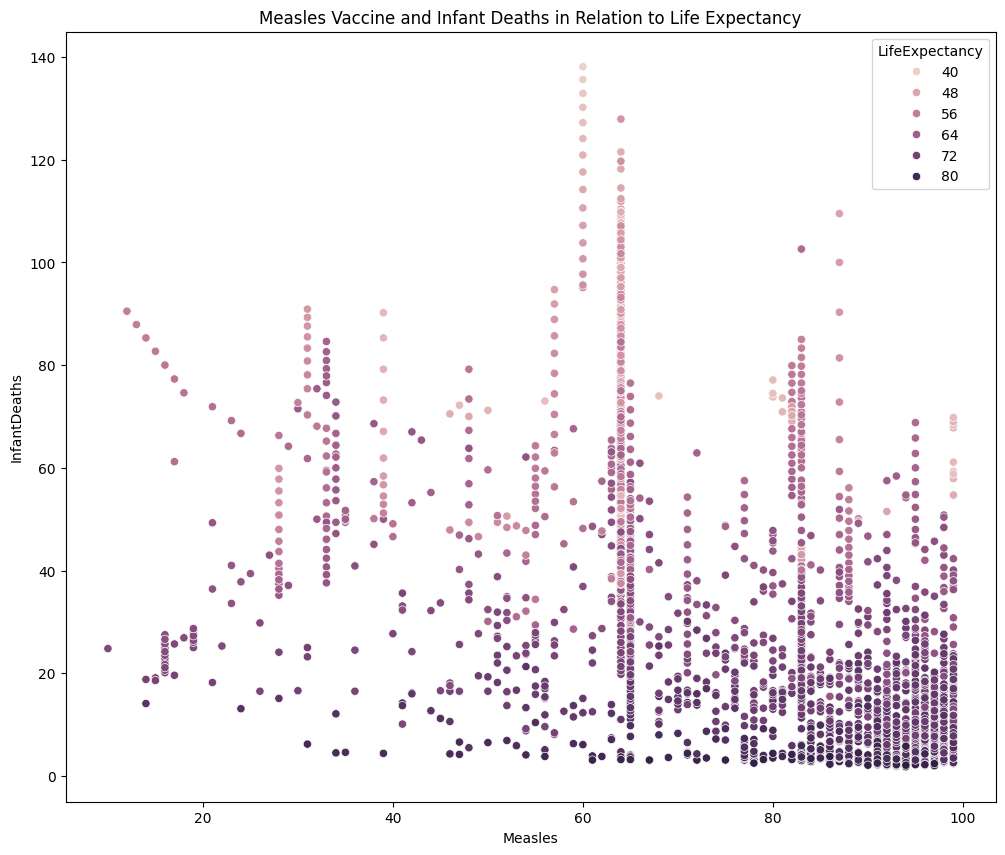

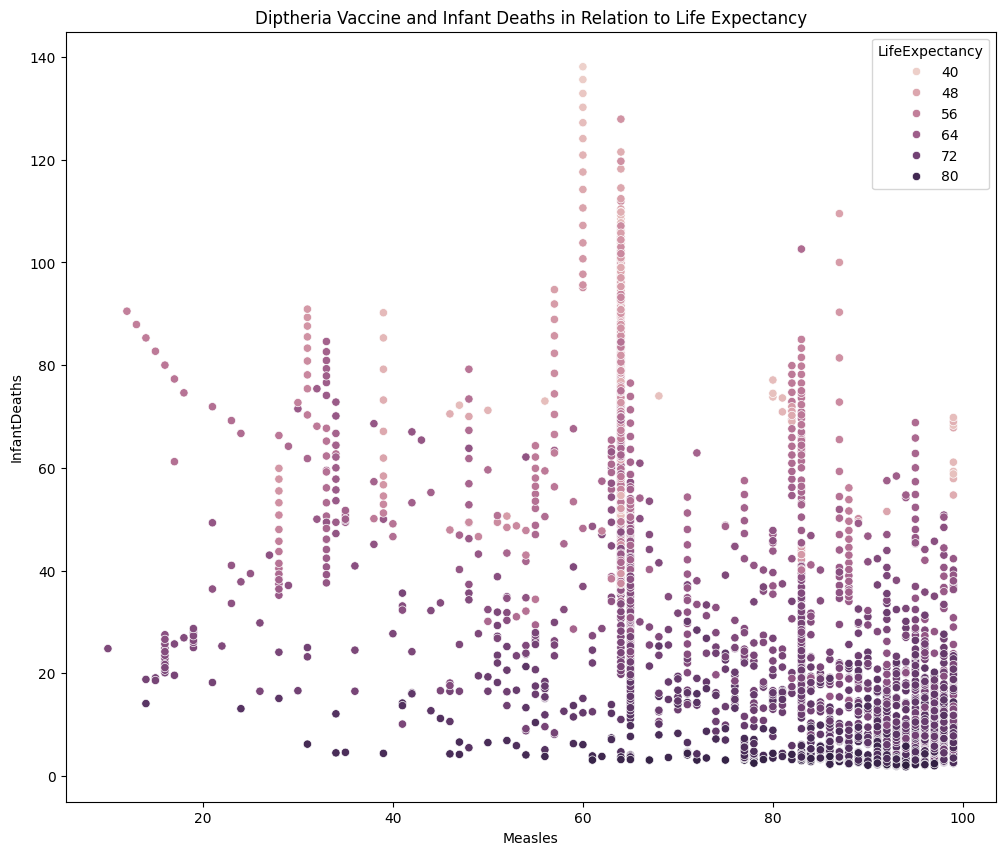

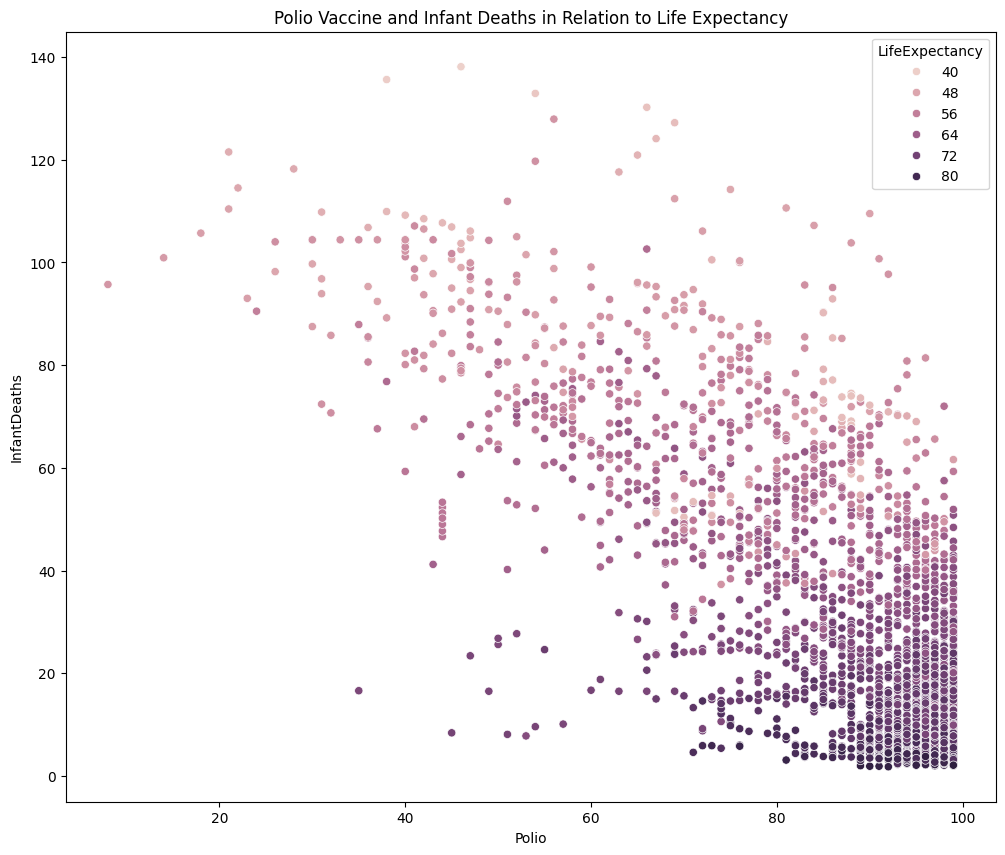

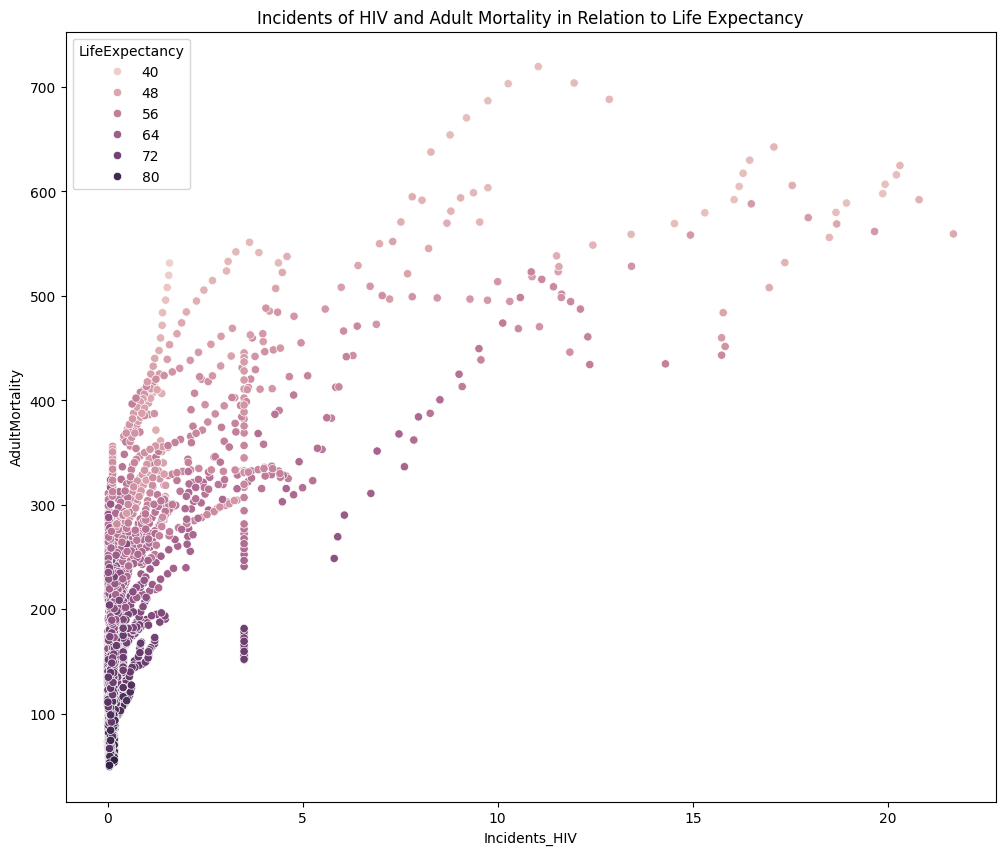

In [50]:
#Hepatitis B
plt.figure(figsize=(12,10))
plt.title('Hepatitis B Vaccine and Infant Deaths in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Hepatitis_B',
                y='InfantDeaths',
                hue='LifeExpectancy');
#Measles
plt.figure(figsize=(12,10))
plt.title('Measles Vaccine and Infant Deaths in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Measles',
                y='InfantDeaths',
                hue='LifeExpectancy');

#Diptheria
plt.figure(figsize=(12,10))
plt.title('Diptheria Vaccine and Infant Deaths in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Measles',
                y='InfantDeaths',
                hue='LifeExpectancy');

#Polio
plt.figure(figsize=(12,10))
plt.title('Polio Vaccine and Infant Deaths in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Polio',
                y='InfantDeaths',
                hue='LifeExpectancy');

#HIV
plt.figure(figsize=(12,10))
plt.title('Incidents of HIV and Adult Mortality in Relation to Life Expectancy')
sns.scatterplot(data=life, 
                x='Incidents_HIV',
                y='AdultMortality',
                hue='LifeExpectancy');

### Insights About the Data

#### Developed vs Developing Nations Life Expectancy

To no surprise, the developed nations do on average have a much higher life expectancy than developing nations. There are also far more nations listed as developing than developed by the WHO.

#### Life Expectancy by Region 

In terms of differnt regions of the world, the European Union and North America have the highest life expectancy, as well as being the most educated regions of the world. Conversly, Africa seems to be the poorest, least education and has the lowest life expectancy from all regions by far. Most regions except Europe, North America and the Middle East are also quite poor (in the context of GDP per capita). The EU also seems to have the most outliers when it comes to GDP per capita, with quite a few nations having upwards of $80,000 or more.

#### Infant and Adult Mortality 

Infant mortality and adult mortality go hand in hand. As infant mortality decreases, life expectancy increases. The same is true for adult mortality. Most nations with a high adult mortality and high infant mortality have generally very low life expectancies. 

#### Behavioural Factors Affecting Life Expectancy 

Alcohol consumption does not seem to play a large factor in life expectancy, as some of the richest nations with the highest life expectancy consume quite a lot of alcohol. On the other hand, BMI and GDP are quite related. Nations with a low average BMI and low GDP generally have less life expectancy overall. This is most likely due to malnutrition, among other things, such as gut disease and lack of clean water. 

#### Education, Income and Population Density in Relation to Life Expectancy

Not surprisingly, countries that have higher education also in general have higher life expectancy, as well as higher GDP per capita. Poorer countries with low education have the least life expectancy. Population density does not seem to play a significant role in life expectancy. However, there are a few nations that have extremely high populations and average to less than average life expectancy. It is, however, not a very strong correlation. 

#### Immunization and Disease 

High infant deaths are significantly related to low infant immunization rates. Many nations with low immunization rates for hepatitis, polio, and measles also, unsurpsingly have very high amounts of infant deaths and low overall life expectancy. HIV incidents are also strongly correlated with life expectancy. Countries with high incidents of HIV also have high adult mortality, as well as low life expectancy. 